In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
all_data = pd.concat([train_data, test_data])

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].mean())
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].mode()[0])
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


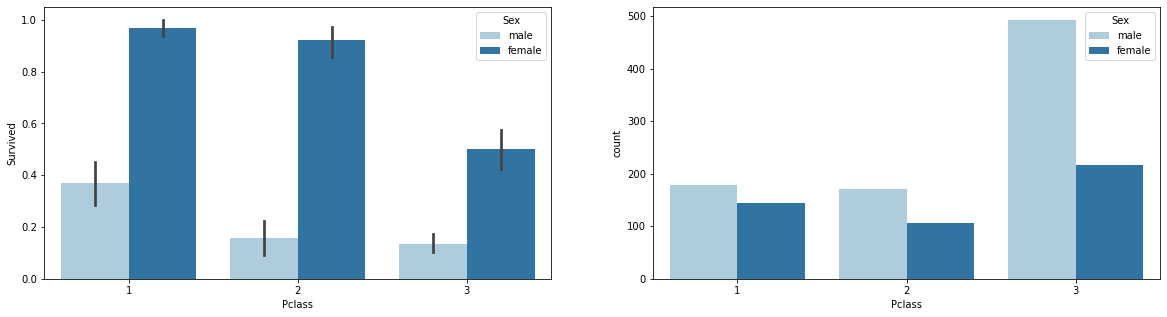

In [8]:
sns.set_palette("Paired")
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(ax = axes[0], data = all_data, x = 'Pclass', y = 'Survived', hue = 'Sex');
sns.countplot(ax = axes[1], data = all_data, x = 'Pclass', hue = 'Sex');


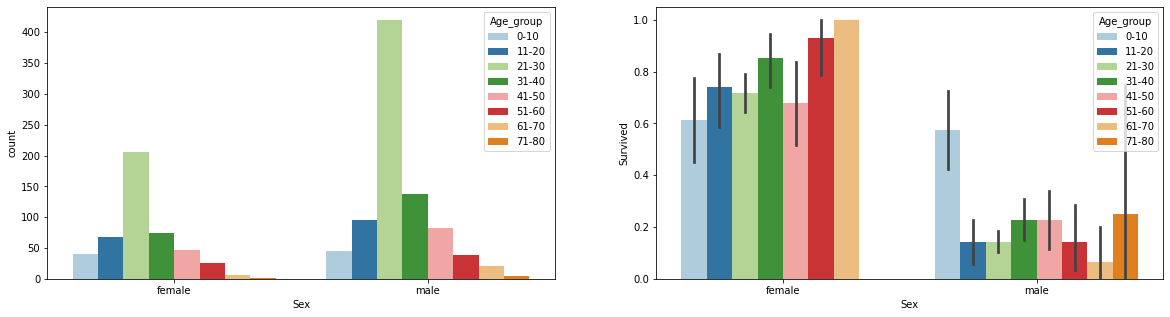

In [9]:
Age_group=[]
for c in all_data.Age:
    if c<11:
        Age_group.append("0-10")
    elif 10<c<21:
        Age_group.append("11-20")
    elif 20<c<31:
        Age_group.append("21-30")
    elif 30<c<41:
        Age_group.append("31-40")
    elif 40<c<51:
        Age_group.append("41-50")
    elif 50<c<61:
        Age_group.append("51-60")
    elif 60<c<71:
        Age_group.append("61-70")
    else:
        Age_group.append("71-80")      
 
all_data['Age_group'] = Age_group
fig, axes = plt.subplots(1,2, figsize=(20,5))
df_sort_age=all_data.sort_values('Age', ascending=True)
sns.countplot(ax=axes[0], data=df_sort_age,x='Sex', hue='Age_group');
sns.barplot(ax=axes[1], x='Sex', hue='Age_group', data=df_sort_age, y='Survived');

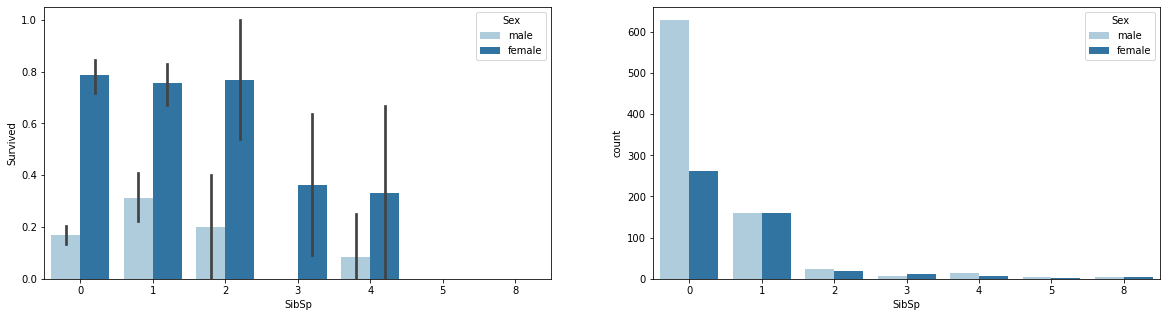

In [10]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(ax = axes[0], data = all_data, x = 'SibSp', y = 'Survived', hue = 'Sex');
sns.countplot(ax = axes[1], data = all_data, x = 'SibSp', hue = 'Sex');

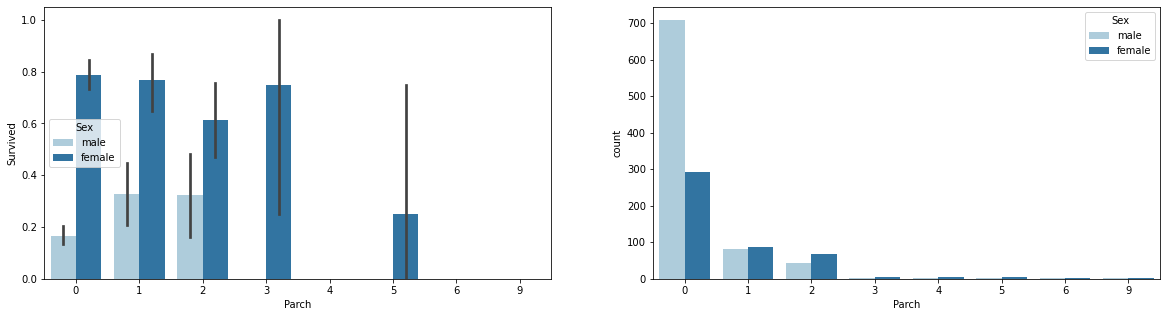

In [11]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(ax = axes[0], data = all_data, x = 'Parch', y = 'Survived', hue = 'Sex');
sns.countplot(ax = axes[1], data = all_data, x = 'Parch', hue = 'Sex');

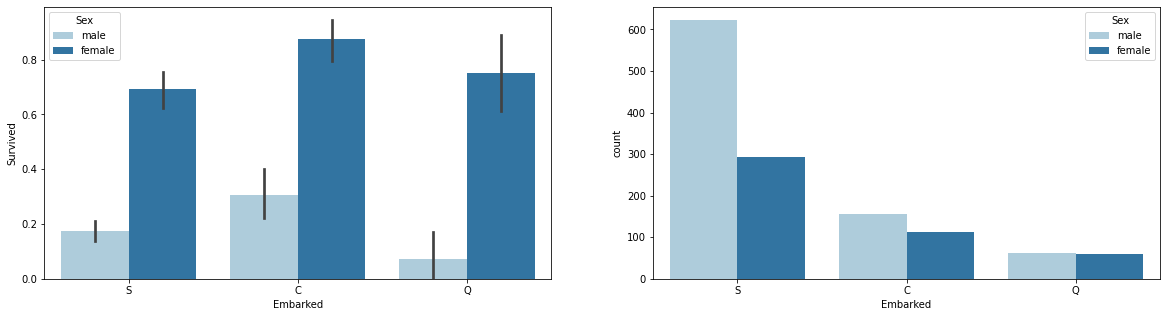

In [12]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(ax = axes[0], data = all_data, x = 'Embarked', y = 'Survived', hue = 'Sex');
sns.countplot(ax = axes[1], data = all_data, x = 'Embarked', hue = 'Sex');

In [13]:
def get_status_name(full_name):
    comma = full_name.split(',')
    point = comma[1].split('.')
    status = point[0]

    for st_list in [' Mr', ' Mrs', ' Miss', ' Master']:
        if st_list == status:
            return status
    else: 
        return 'Other'

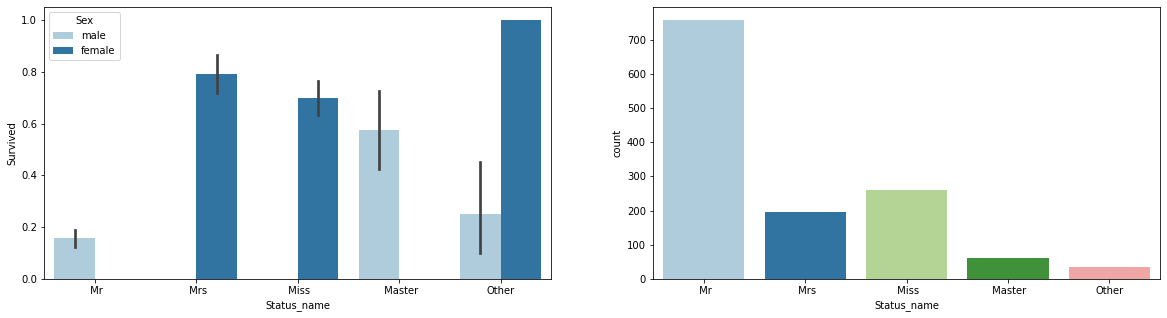

In [14]:
all_data['Status_name'] = all_data['Name'].apply(get_status_name)
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(ax = axes[0], data = all_data, x = 'Status_name', y = 'Survived', hue = 'Sex');
sns.countplot(ax = axes[1], data = all_data, x = 'Status_name');

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Age_group    1309 non-null   object 
 13  Status_name  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 185.7+ KB


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = ['Age', 'SibSp', 'Fare']
cat_attribs = ['Pclass', 'Sex', 'Parch', 'Embarked', 'Status_name']
needly_attribs = num_attribs + cat_attribs
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
titanic_repared = full_pipeline.fit_transform(all_data)
X = titanic_repared [:891]
y = all_data.Survived[:891]

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc = SVC(probability = True, kernel="poly", degree=2)

cv = cross_val_score(svc,X,y,cv=10)
print(cv)
print(cv.mean())

[0.84444444 0.86516854 0.76404494 0.87640449 0.83146067 0.80898876
 0.79775281 0.7752809  0.88764045 0.86516854]
0.8316354556803995


In [78]:
svc.fit(X, y)
X_test = titanic_repared[891:]
Pass_id_test = all_data.PassengerId[891:]
y_test = svc.predict(X_test).astype(int)

output = pd.DataFrame({'PassengerId': Pass_id_test, 'Survived': y_test})
output.to_csv('titanic_submission.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
model = LogisticRegression(max_iter = 2000)
model.fit(X,y)
predictions=model.predict(X_test).astype(int)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('titanic_submission2.csv', index=False)